### Predicting The Future with Python
#### PYMNTOs, June 8, 2017

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [2]:
%matplotlib inline

In [9]:
# Read in the source data - downloaded from google analytics
df = pd.read_excel('https://github.com/chris1610/pbpython/blob/master/data/All-Web-Site-Data-Audience-Overview.xlsx?raw=True')

In [10]:
df.head()

,Day Index,Sessions
0,2014-09-25,1
1,2014-09-26,4
2,2014-09-27,8
3,2014-09-28,42
4,2014-09-29,233


In [11]:
# Convert to log format
df['Sessions'] = np.log(df['Sessions'])

In [12]:
# Need to name the columns like this in order for prophet to work
df.columns = ["ds", "y"]

In [24]:
# Create the model
m1 = Prophet()
m1.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\lhphong\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [15]:
# Predict out a year
future1 = m1.make_future_dataframe(periods=365)
forecast1 = m1.predict(future1)

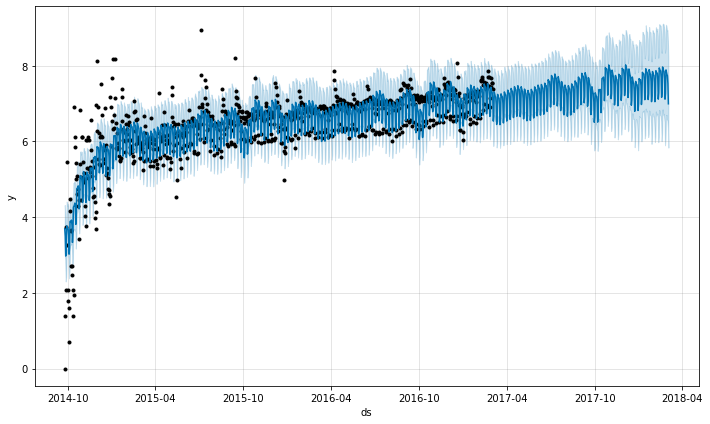

In [16]:
m1.plot(forecast1);

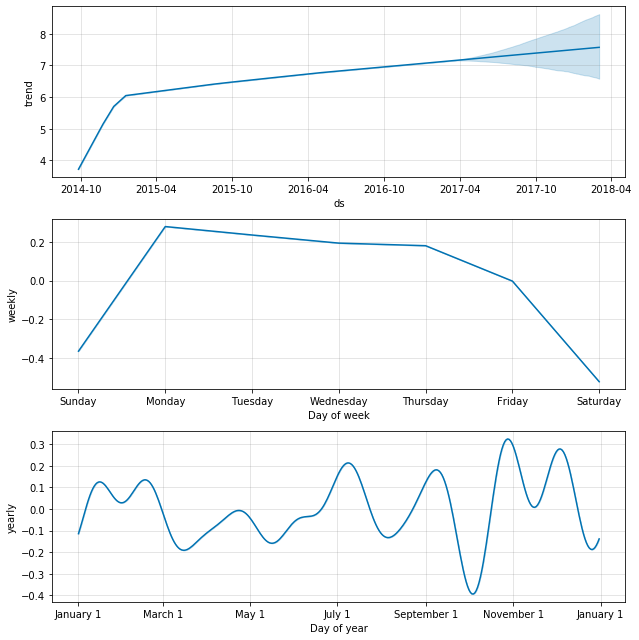

In [17]:
m1.plot_components(forecast1);

In [18]:
articles = pd.DataFrame({
  'holiday': 'publish',
  'ds': pd.to_datetime(['2014-09-27', '2014-10-05', '2014-10-14', '2014-10-26', '2014-11-9',
                        '2014-11-18', '2014-11-30', '2014-12-17', '2014-12-29', '2015-01-06',
                        '2015-01-20', '2015-02-02', '2015-02-16', '2015-03-23', '2015-04-08',
                        '2015-05-04', '2015-05-17', '2015-06-09', '2015-07-02', '2015-07-13',
                        '2015-08-17', '2015-09-14', '2015-10-26', '2015-12-07', '2015-12-30',
                        '2016-01-26', '2016-04-06', '2016-05-16', '2016-06-15', '2016-08-23',
                        '2016-08-29', '2016-09-06', '2016-11-21', '2016-12-19', '2017-01-17',
                        '2017-02-06', '2017-02-21', '2017-03-06']),
  'lower_window': 0,
  'upper_window': 5,
})
articles.head()

,holiday,ds,lower_window,upper_window
0,publish,2014-09-27,0,5
1,publish,2014-10-05,0,5
2,publish,2014-10-14,0,5
3,publish,2014-10-26,0,5
4,publish,2014-11-09,0,5


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\lhphong\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



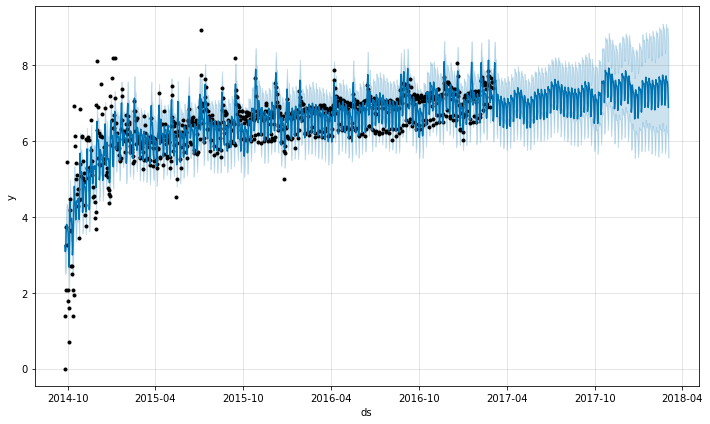

In [20]:
m2 = Prophet(holidays=articles).fit(df)
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m2.predict(future2)
m2.plot(forecast2);

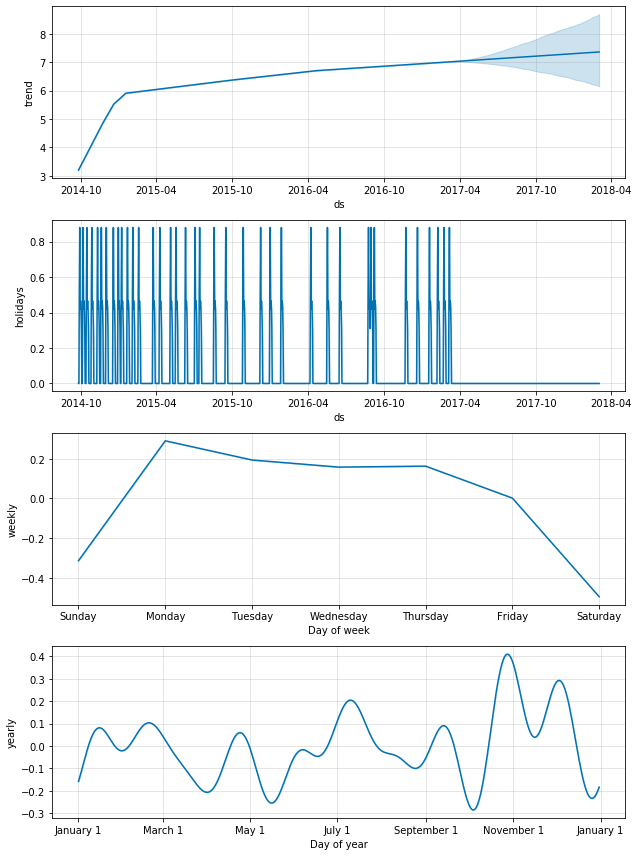

In [22]:
m2.plot_components(forecast2);

In [23]:
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-25,3.198225,2.705227,3.805705,3.198225,3.198225,0.049240,0.049240,0.049240,0.000000,...,0.162744,0.162744,0.162744,-0.113504,-0.113504,-0.113504,0.0,0.0,0.0,3.247466
1,2014-09-26,3.226540,2.501654,3.621185,3.226540,3.226540,-0.140089,-0.140089,-0.140089,0.000000,...,0.002054,0.002054,0.002054,-0.142144,-0.142144,-0.142144,0.0,0.0,0.0,3.086450
2,2014-09-27,3.254854,2.543218,3.653660,3.254854,3.254854,-0.135647,-0.135647,-0.135647,0.527885,...,-0.493567,-0.493567,-0.493567,-0.169965,-0.169965,-0.169965,0.0,0.0,0.0,3.119206
3,2014-09-28,3.283168,3.073759,4.186597,3.283168,3.283168,0.371232,0.371232,0.371232,0.880006,...,-0.312517,-0.312517,-0.312517,-0.196257,-0.196257,-0.196257,0.0,0.0,0.0,3.654399
4,2014-09-29,3.311482,3.229707,4.351091,3.311482,3.311482,0.489329,0.489329,0.489329,0.419652,...,0.289997,0.289997,0.289997,-0.220320,-0.220320,-0.220320,0.0,0.0,0.0,3.800811


In [15]:
forecast2["Sessions"] = np.exp(forecast2.yhat).round()

In [19]:
forecast2[["ds", "Sessions"]].tail()

,ds,Sessions
1251,2018-02-27,1998.0
1252,2018-02-28,1911.0
1253,2018-03-01,1905.0
1254,2018-03-02,1607.0
1255,2018-03-03,970.0
